In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import random

## Group Assignment
### Team Number: 14
### Team Member Names: Max Cheng, Nathan Chu, Rahim Merchant, Matthew Yang
### Team Strategy Chosen: Safe

In [2]:
# Constant/Variable Declarations

# Since we must spend all our cash, let's check to make sure it's 0 at the end of our program
capital = 500000

# By the assignment requirements...
min_weight = 0.02
max_weight = 0.25

# Final output in Jupyter Notebook
Portfolio_Final = pd.DataFrame()

# DataFrame that our program should write to Stocks_Group_14.csv
Stocks_Final = pd.DataFrame()

# Date that we buy the stocks
buy_date = '2022-11-19'

In [3]:
'''
- Reads Tickers.csv as a DataFrame
- Turns the first (and only) column into a list
NOTE: Check what the CSV file we will be receiving for the comeptition looks like.
      We will probably have to update this line of code...
'''

# Tickers Easy.csv: Dummy list consisting of 25 large cap stocks in the s&p500
ticker_lst = pd.read_csv("Tickers Easy.csv", header=None)[0].tolist()

In [4]:
'''
TODO: Filter the list for invalid or impermissible tickers
- US listed stocks only (so nothing ending in .TO, but we would have to account for other cases too)
'''
american_tickers = ticker_lst

In [5]:
'''
- How do we store the ticker names of the stocks that failed to download?
- The dates at the bottom few rows look like like dividend payments? How do we remove them?
'''

start_date = '2022-01-01'
end_date = buy_date

data = yf.download(tickers = american_tickers,
                   # threads = True
                   # prepost = True
                   # group_by='ticker',
                   start=start_date,
                   end=end_date).dropna(how='all')
                   
data

[*********************100%***********************]  25 of 25 completed


Adj Close                                                 \
                  AAPL        ABBV        AMZN        BAC         CVX   
Date                                                                    
2022-01-03  180.959747  130.341797  170.404495  45.393047  115.113411   
2022-01-04  178.663086  130.091553  167.522003  47.172203  117.207962   
2022-01-05  173.910645  130.774918  164.356995  46.376007  117.970497   
2022-01-06  171.007523  130.158936  163.253998  47.309818  118.974327   
2022-01-07  171.176514  129.822037  162.554001  48.341927  120.682785   
...                ...         ...         ...        ...         ...   
2022-11-14  148.279999  151.740005   98.489998  37.759998  185.118027   
2022-11-15  150.039993  153.039993   98.940002  37.700001  186.606522   
2022-11-16  148.789993  151.869995   97.120003  37.360001  183.570007   
2022-11-17  150.720001  152.160004   94.849998  37.169998  184.089996   
2022-11-18  151.289993  154.979996   94.139999  37.189999  182.990005   

                                                                        ...  \
                  GOOG       GOOGL          HD         JNJ         JPM  ...   
Date                                                                    ...   
2022-01-03  145.074493  144.991501  401.022980  168.227280  156.752396  ...   
2022-01-04  144.416504  144.399506  405.144684  167.776169  162.694855  ...   
2022-01-05  137.653503  137.774994  399.649109  168.894135  159.720459  ...   
2022-01-06  137.550995  137.747498  398.196686  168.315552  161.417328  ...   
2022-01-07  137.004501  137.016998  386.273163  170.590729  163.016678  ...   
...                ...         ...         ...         ...         ...  ...   
2022-11-14   96.029999   95.699997  306.920013  171.910004  133.910004  ...   
2022-11-15   98.720001   98.440002  311.929993  172.389999  132.940002  ...   
2022-11-16   98.989998   98.849998  314.910004  173.460007  133.119995  ...   
2022-11-17   98.500000   98.360001  311.440002  174.860001  132.539993  ...   
2022-11-18   97.800003   97.430000  313.179993  176.199997  133.839996  ...   

              Volume                                                   \
                MSFT      NVDA      PEP       PFE       PG       TSLA   
Date                                                                    
2022-01-03  28865100  39154700  5488900  57219200  9317300  103931400   
2022-01-04  32674300  52715400  4717600  66993100  9253800  100248300   
2022-01-05  40054300  49806400  6564600  52956400  9330200   80119800   
2022-01-06  39646100  45418600  4288700  37000400  7556000   90336600   
2022-01-07  32720000  40993900  4916000  27703400  6098500   84164700   
...              ...       ...      ...       ...      ...        ...   
2022-11-14  31123300  52785200  5633000  26143000  8516200   92226600   
2022-11-15  31390100  54587600  5153600  25440500  7732400   91293800   
2022-11-16  24093300  64954700  4701100  15822200  6193700   66567600   
2022-11-17  23123500  71089400  3920300  13231100  5186300   64336000   
2022-11-18  27591800  49167700  4498100  20664300  5671400   75904900   

                                                   
                UNH         V       WMT       XOM  
Date                                               
2022-01-03  3033600   7694500   6902200  24282400  
2022-01-04  3908100  10629300  11310000  38584000  
2022-01-05  3921100   9594600  11806000  34033300  
2022-01-06  6555200   7877500   7276300  30668500  
2022-01-07  5494200  10702100   6574500  23985400  
...             ...       ...       ...       ...  
2022-11-14  5238400   5796100  12508600  20858300  
2022-11-15  5103800   7316100  25516200  19373800  
2022-11-16  3430800   6125300  10864400  13591000  
2022-11-17  4246300   5385600   8263800  12425900  
2022-11-18  3566000   8027600   6325300  15407000  

[223 rows x 150 columns]

In [6]:
'''
TODO: Second filtering iteration
- Remove stocks that failed downloads
- Average MONTHLY volume of at least 200,000 shares from Jan 01, 2022 to Oct 31, 2022
'''

filtered_tickers = american_tickers

In [7]:
'''
TODO: Calculations
Let's discuss how we want to approach this from a finance POV before committing to deep into anything

Some ideas...
1. Fetch beta for each stock, find a combination of 25 that sum to a number close to 0
- Pros: Seems easy enough (famous last words)
- Cons: Everything is becoming more correlated now, we may have to look at individual correlations

2. Create a correlation matrix (Correlation of each stock with each other stock), then pick the
   PAIRS that sum to the lowest number. Ideally, we would have a portfolio of pairs of stocks,
   with the 2 stocks in each pair having perfect NEGATIVE correlation. Thus the portfolio never
   fluctuates.
'''

portfolio_stocks = filtered_tickers

In [8]:
def generate_allocation(portfolio_size):
    allocation = []
    
    for i in range(portfolio_size):
        n = random.randint(15, 100)
        allocation.append(n)

    allocation_sum = np.sum(allocation)

    for j in range(portfolio_size):
        allocation[j] = allocation[j]/allocation_sum
    
    if min(allocation) < min_weight:
        return generate_allocation(portfolio_size)
    elif max(allocation) > max_weight:
        return generate_allocation(portfolio_size)
    else:
        return allocation

generate_allocation(len(portfolio_stocks))

[0.027950310559006212,
 0.05217391304347826,
 0.02360248447204969,
 0.059006211180124224,
 0.030434782608695653,
 0.027950310559006212,
 0.052795031055900624,
 0.037888198757763975,
 0.03850931677018633,
 0.02608695652173913,
 0.04906832298136646,
 0.05093167701863354,
 0.02422360248447205,
 0.03602484472049689,
 0.02608695652173913,
 0.05031055900621118,
 0.02981366459627329,
 0.03291925465838509,
 0.024844720496894408,
 0.05652173913043478,
 0.046583850931677016,
 0.031055900621118012,
 0.055900621118012424,
 0.049689440993788817,
 0.05962732919254658]

In [9]:
def get_returns(stocks):
    daily_returns = pd.DataFrame()
    temp = pd.DataFrame()
    
    for stock in stocks:
        daily_returns[stock] = data['Adj Close'].loc[start_date:end_date][stock]
    
    weekly_returns = daily_returns.resample('W').ffill()
    return weekly_returns.pct_change().dropna()
    
get_returns(portfolio_stocks)

,AAPL,MSFT,AMZN,TSLA,GOOG,GOOGL,UNH,JNJ,XOM,JPM,...,CVX,LLY,MA,ABBV,PFE,MRK,PEP,BAC,KO,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-16,0.005227,-0.012228,-0.002559,0.022055,0.020306,0.017980,0.022002,-0.035125,0.043409,-0.055456,...,0.031433,-0.059268,0.006736,0.017793,-0.013819,0.013449,0.008961,-0.025824,0.017570,0.001173
2022-01-23,-0.061594,-0.045680,-0.120237,-0.100714,-0.069352,-0.065450,-0.016045,-0.017695,0.004174,-0.081132,...,-0.015896,-0.004342,-0.045843,-0.028630,-0.039308,-0.017203,-0.008085,-0.062409,-0.015312,-0.033572
2022-01-30,0.048765,0.041314,0.009359,-0.103348,0.024579,0.023011,0.010603,0.041972,0.043093,0.010546,...,0.029154,0.008393,0.077250,0.045007,0.036997,0.011503,-0.008897,0.021149,0.006452,-0.019046
2022-02-06,0.013384,-0.007526,0.094886,0.090943,0.072973,0.074555,0.036712,-0.000931,0.081429,0.040584,...,0.040349,-0.011546,-0.000810,0.019794,-0.024480,-0.028925,-0.001042,0.052540,0.001972,0.013162
2022-02-13,-0.021753,-0.035628,-0.027569,-0.068579,-0.062133,-0.062882,-0.010431,-0.022840,-0.003818,0.008915,...,0.021563,-0.026953,-0.032522,0.009669,-0.041887,-0.024440,-0.022668,-0.007456,-0.010991,-0.028709
2022-02-20,-0.007946,-0.022081,-0.004514,-0.003512,-0.027306,-0.028891,-0.021584,-0.019685,-0.035532,-0.011564,...,-0.028739,0.023641,0.000487,0.014224,-0.044309,-0.003523,-0.005161,-0.040902,0.037320,0.019656
2022-02-27,-0.014644,0.032577,0.007778,-0.054972,0.031058,0.031107,0.016973,0.016161,0.006205,-0.027409,...,0.052166,0.043860,-0.002325,0.038256,-0.016691,-0.000655,0.003995,-0.020453,0.004957,-0.011667
2022-03-06,-0.010191,-0.025058,-0.052979,0.035092,-0.017823,-0.018987,0.048134,0.020964,0.080293,-0.091708,...,0.130147,0.047917,-0.103850,0.006821,0.019489,0.019785,-0.009145,-0.085957,-0.004455,0.047221
2022-03-13,-0.051725,-0.033775,-0.000800,-0.051223,-0.012462,-0.015435,-0.028780,-0.000767,0.009870,-0.040997,...,0.077214,0.013048,-0.018049,-0.009963,0.033299,0.005525,-0.072519,-0.015140,-0.074317,-0.005252


In [10]:
def calculate_return(stocks, returns, allocation):
    '''
    params
    stocks: list of stocks
    returns: dataframe of daily returns
    allocation: list of weightings
    '''
    
    portfolio_weekly_return = pd.DataFrame()
    daily_return = 0
    count = 0
    
    for stock in stocks:
        portfolio_weekly_return[stock] = returns[stock] * allocation[count]
        count += 1
        
    portfolio_weekly_return['Portfolio Return'] = portfolio_weekly_return.sum(axis=1)
    
    return portfolio_weekly_return['Portfolio Return']

calculate_return(portfolio_stocks, 
                 get_returns(portfolio_stocks), 
                 generate_allocation(len(portfolio_stocks)))

Date
2022-01-16   -0.002883
2022-01-23   -0.047234
2022-01-30    0.012960
2022-02-06    0.023139
2022-02-13   -0.026139
2022-02-20   -0.008529
2022-02-27   -0.001906
2022-03-06   -0.000882
2022-03-13   -0.022097
2022-03-20    0.062757
2022-03-27    0.021238
2022-04-03    0.004741
2022-04-10    0.003123
2022-04-17   -0.026727
2022-04-24   -0.025388
2022-05-01   -0.024294
2022-05-08    0.003503
2022-05-15   -0.018971
2022-05-22   -0.044575
2022-05-29    0.065224
2022-06-05   -0.015608
2022-06-12   -0.038449
2022-06-19   -0.051351
2022-06-26    0.071614
2022-07-03   -0.024487
2022-07-10    0.029806
2022-07-17   -0.008052
2022-07-24    0.016924
2022-07-31    0.032665
2022-08-07   -0.009038
2022-08-14    0.030120
2022-08-21   -0.003023
2022-08-28   -0.037648
2022-09-04   -0.027397
2022-09-11    0.035796
2022-09-18   -0.036408
2022-09-25   -0.037942
2022-10-02   -0.023219
2022-10-09    0.008206
2022-10-16   -0.004809
2022-10-23    0.048928
2022-10-30    0.027404
2022-11-06   -0.034271
2022-1

In [11]:
portfolio_performance = pd.DataFrame()
portfolio_expected_returns = []
portfolio_risks = []

number_of_portfolios = 5000
weights = []
weekly_returns = get_returns(portfolio_stocks)

for i in range(number_of_portfolios):
    weights.append(generate_allocation(len(portfolio_stocks)))
    temp_portfolio = calculate_return(portfolio_stocks, 
                                      weekly_returns, 
                                      weights[i])
    portfolio_expected_returns.append(np.mean(temp_portfolio))
    portfolio_risks.append(np.std(temp_portfolio))
    

portfolio_performance['Expected Return'] = portfolio_expected_returns
portfolio_performance['Risk'] = portfolio_risks
portfolio_performance

,Expected Return,Risk
0,-0.001525,0.031650
1,-0.000542,0.030393
2,-0.000728,0.030384
3,-0.000808,0.031100
4,-0.001374,0.031379
...,...,...
4995,-0.001886,0.031201
4996,-0.001395,0.031388
4997,-0.000853,0.030330
4998,-0.000886,0.030595


In [12]:
least_risky_portfolio = weights[portfolio_performance.loc[portfolio_performance['Risk'] 
                                                          == min(portfolio_performance['Risk'])].index.tolist()[0]]
least_risky_portfolio

[0.020663744520976832,
 0.021916092673763307,
 0.043832185347526614,
 0.021916092673763307,
 0.040701314965560426,
 0.046963055729492796,
 0.05134627426424546,
 0.05385097056981841,
 0.06261740763932373,
 0.021289918597370068,
 0.036318096430807766,
 0.03318722604884158,
 0.038822792736380715,
 0.026299311208515967,
 0.055103318722604884,
 0.053224796493425174,
 0.031308703819661866,
 0.021916092673763307,
 0.05385097056981841,
 0.033813400125234816,
 0.057608015028177834,
 0.048215403882279274,
 0.021916092673763307,
 0.06073888541014402,
 0.042579837194740136]

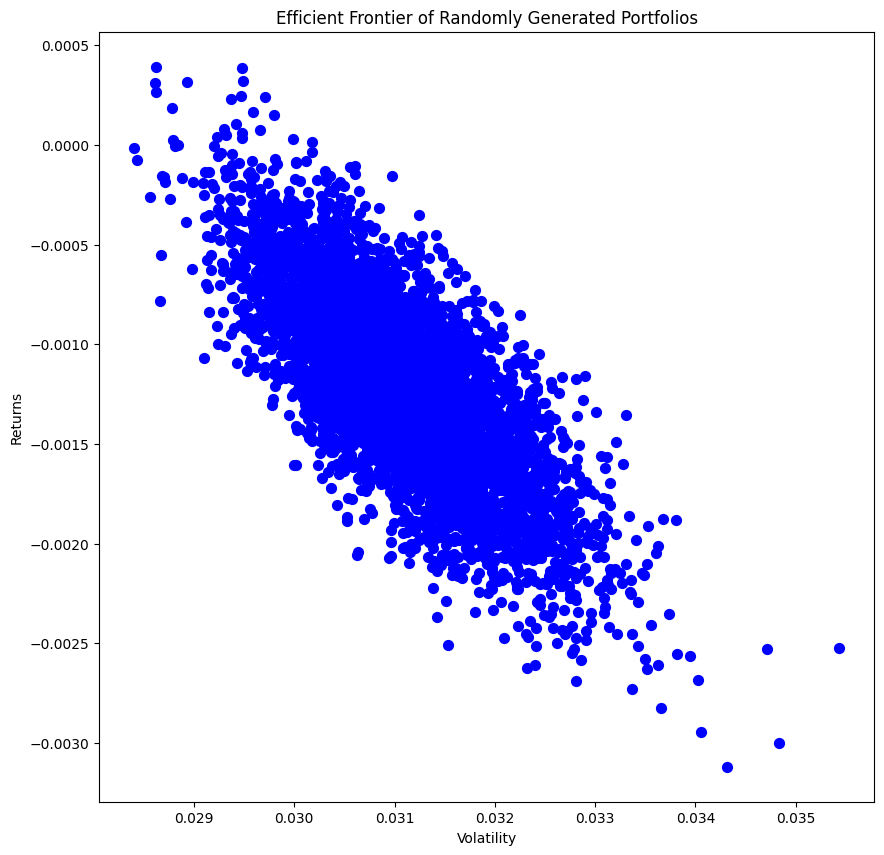

In [13]:
'''
NOTE: This scatter plot has been Policy 71'ed from last year's safe group.
MAKE A COMPLETELY NEW GRAPH BEFORE SUBMITTING!!!
'''

plt.subplots(figsize=[10, 10])

plt.scatter(
    x=portfolio_performance['Risk'], y=portfolio_performance['Expected Return'], s=10, alpha=0.7
)

plt.scatter(
    portfolio_performance['Risk'], portfolio_performance['Expected Return'], color="b", marker=".", s=200
)

plt.title("Efficient Frontier of Randomly Generated Portfolios")
plt.xlabel("Volatility")
plt.ylabel("Returns")

plt.show()

In [14]:
data = yf.download(tickers = portfolio_stocks,
                   start=start_date,
                   end=end_date).dropna(how='all')

Portfolio_Final.index = range(1,len(portfolio_stocks)+1)
Portfolio_Final["Ticker"] = portfolio_stocks
Portfolio_Final["Price"] = data['Adj Close'].iloc[len(data)-1].tolist()
Portfolio_Final["Weight"] = least_risky_portfolio
Portfolio_Final["Value"] = Portfolio_Final["Weight"] * capital
Portfolio_Final["Shares"] = Portfolio_Final["Value"] / Portfolio_Final["Price"]

Portfolio_Final = Portfolio_Final[["Ticker", "Price", "Shares", "Value", "Weight"]]

# If the value is accurate up to 5 decimal places, we can be confident that any
# discrepancy can be attributed to rounding
if np.round(Portfolio_Final["Value"].sum(), 5) == capital and np.round(Portfolio_Final["Weight"].sum(), 5) == 1:
    print ("Total adds to $500,000 and weights add to 100%")

[*********************100%***********************]  25 of 25 completed
Total adds to $500,000 and weights add to 100%


In [15]:
Portfolio_Final

,Ticker,Price,Shares,Value,Weight
1,AAPL,151.289993,68.291842,10331.872260,0.020664
2,MSFT,154.979996,70.706198,10958.046337,0.021916
3,AMZN,94.139999,232.803195,21916.092674,0.043832
4,TSLA,37.189999,294.650356,10958.046337,0.021916
5,GOOG,182.990005,111.211852,20350.657483,0.040701
6,GOOGL,97.800003,240.097414,23481.527865,0.046963
7,UNH,97.430000,263.503408,25673.137132,0.051346
8,JNJ,313.179993,85.974474,26925.485285,0.053851
9,XOM,176.199997,177.688447,31308.703820,0.062617
10,JPM,133.839996,79.534964,10644.959299,0.021290


In [16]:
# Write to CSV
Stocks_Final = Portfolio_Final[["Ticker", "Shares"]]
Stocks_Final.to_csv("Stocks_Group_14.csv")

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Max Cheng, Nathan Chu, Rahim Merchant, Matthew Yang